In [ ]:
!pip install h2o

In [ ]:
import h2o

In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,22 mins 11 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.2
H2O_cluster_version_age:,"7 days, 14 hours and 3 minutes"
H2O_cluster_name:,H2O_from_python_unknownUser_jed7wc
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.160 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
from h2o.automl import H2OAutoML

In [ ]:
train = h2o.upload_file('/content/sample_data/response_soude__.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
test = h2o.upload_file('/content/sample_data/unseen test data_2.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
y_train = "Ave response time"
x_train = train.columns
x_train.remove(y_train)

In [ ]:
y_test = "Ave response time"
x_test = test.columns
x_test.remove(y_test)

In [ ]:
am1 = H2OAutoML(max_models=10, exclude_algos=['StackedEnsemble'], seed = 1234, verbosity='info', nfolds=10)

In [ ]:
am1.train(x = x_train, y = y_train, training_frame = train, validation_frame=test)

AutoML progress: |
01:53:40.211: Project: AutoML_3_20230802_15340
01:53:40.211: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
01:53:40.213: Setting stopping tolerance adaptively based on the training frame: 0.013689641954834839
01:53:40.213: Build control seed: 1234
01:53:40.213: training frame: Frame key: AutoML_3_20230802_15340_training_Key_Frame__upload_b7a20ba216c8393fbaa25a79492f440a.hex    cols: 12    rows: 5336  chunks: 1    size: 113868  checksum: 5311639713264652400
01:53:40.213: validation frame: Frame key: Key_Frame__upload_80d6a7b8fd4ff21ae767009141104666.hex    cols: 12    rows: 1037  chunks: 1    size: 18191  checksum: -8781524109905920851
01:53:40.213: leaderboard frame: NULL
01:53:40.213: blending frame: NULL
01:53:40.214: response column: Ave response time
01:5

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_3_AutoML_3_20230802_15340


Model Summary: 
    number_of_trees
--  -----------------
    51

ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 491.5954682015017
RMSE: 22.171952286650395
MAE: 6.799622744746294
RMSLE: NaN
Mean Residual Deviance: 491.5954682015017

ModelMetricsRegression: xgboost
** Reported on validation data. **

MSE: 1670.4150029586363
RMSE: 40.870710820325066
MAE: 21.406044923236077
RMSLE: 0.4223688272513234
Mean Residual Deviance: 1670.4150029586363

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 492.7522126197603
RMSE: 22.19802271869637
MAE: 6.840906070703096
RMSLE: NaN
Mean Residual Deviance: 492.7522126197603

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
mae                     6.84091   0.159535    6.76243       7.02014       6.78317       6.83757       6.5111        7.08312       6.88649       6.77172       6.9494        6.80401
mean_residual_deviance  492.759   28.2882     491.345       497.208       486.748       492.082       424.252       527.956       526.674       487.998       498.688       494.641
mse                     492.759   28.2882     491.345       497.208       486.748       492.082       424.252       527.956       526.674       487.998       498.688       494.641
r2                      0.976571  0.00133583  0.976521      0.977063      0.97766       0.976524      0.979544      0.974592      0.975775      0.975737      0.975842      0.976455
residual_deviance       492.759   28.2882     491.345       497.208       486.748       492.082       424.252       527.956       526.674       487.998       498.688       494.641
rmse                    22.1896   0.649267    22.1663       22.2982       22.0624       22.1829       20.5974       22.9773       22.9494       22.0907       22.3313       22.2405
rmsle                   nan       0           nan           nan           nan           nan           nan           nan           nan           nan           nan           nan

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance    validation_rmse    validation_mae    validation_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------  -----------------  ----------------  ---------------------
    2023-08-02 01:55:11  5.989 sec   0                  172.415          93.21           29726.8              128.937            74.3256           16624.7
    2023-08-02 01:55:11  6.069 sec   5                  50.6346          24.2576         2563.86              59.9624            28.5321           3595.49
    2023-08-02 01:55:11  6.102 sec   10                 27.386           11.3233         749.994              46.5708            22.3485           2168.84
    2023-08-02 01:55:11  6.151 sec   15                 23.7604          9.00853         564.557              44.7868            23.1435           2005.85
    2023-08-02 01:55:11  6.187 sec   20                 22.5848          7.84101         510.075              43.4736            22.7802           1889.95
    2023-08-02 01:55:11  6.224 sec   25                 22.3478          7.40542         499.424              40.9562            21.4475           1677.41
    2023-08-02 01:55:11  6.266 sec   30                 22.2429          7.10871         494.747              40.9319            21.389            1675.42
    2023-08-02 01:55:11  6.308 sec   35                 22.2129          7.05079         493.413              40.722             2

In [ ]:
lb = am1.leaderboard

In [ ]:
lb

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
XGBoost_3_AutoML_3_20230802_15340,22.198,492.752,6.84091,nan,492.752
XGBoost_2_AutoML_3_20230802_15340,22.2177,493.626,6.71985,0.154785,493.626
XGBoost_1_AutoML_3_20230802_15340,22.3681,500.331,6.95718,nan,500.331
GBM_2_AutoML_3_20230802_15340,22.5611,509.001,7.07949,nan,509.001
GBM_3_AutoML_3_20230802_15340,22.5745,509.608,7.04403,0.146707,509.608
GBM_4_AutoML_3_20230802_15340,22.6215,511.733,7.04296,0.148025,511.733
GBM_1_AutoML_3_20230802_15340,28.356,804.063,11.7865,nan,804.063
DRF_1_AutoML_3_20230802_15340,32.2172,1037.95,14.7323,0.67394,1037.95
XRT_1_AutoML_3_20230802_15340,37.542,1409.4,18.0299,0.750688,1409.4
GLM_1_AutoML_3_20230802_15340,101.519,10306,71.2575,nan,10306


In [ ]:
dataset_pred=am1.leader.predict(test)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [ ]:
am1.leader.model_performance(test)

ModelMetricsRegression: xgboost
** Reported on test data. **

MSE: 1670.4150029586363
RMSE: 40.870710820325066
MAE: 21.406044923236077
RMSLE: 0.4223688272513234
Mean Residual Deviance: 1670.4150029586363

In [ ]:
best_model = am1.leader

In [ ]:
predictions = best_model.predict(test)
r2_score = best_model.r2()
print("R2 Score:", r2_score)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%
R2 Score: 0.9766337648183709


In [ ]:
model_ids = list(am1.leaderboard['model_id'].as_data_frame().iloc[:,0])

In [ ]:
model_ids

['XGBoost_3_AutoML_3_20230802_15340',
 'XGBoost_2_AutoML_3_20230802_15340',
 'XGBoost_1_AutoML_3_20230802_15340',
 'GBM_2_AutoML_3_20230802_15340',
 'GBM_3_AutoML_3_20230802_15340',
 'GBM_4_AutoML_3_20230802_15340',
 'GBM_1_AutoML_3_20230802_15340',
 'DRF_1_AutoML_3_20230802_15340',
 'XRT_1_AutoML_3_20230802_15340',
 'GLM_1_AutoML_3_20230802_15340']

In [ ]:
h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][1])

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_2_AutoML_3_20230802_15340


Model Summary: 
    number_of_trees
--  -----------------
    44

ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 491.6170626697644
RMSE: 22.17243925845247
MAE: 6.677826279922314
RMSLE: 0.13387355342799517
Mean Residual Deviance: 491.6170626697644

ModelMetricsRegression: xgboost
** Reported on validation data. **

MSE: 1227.8697584730608
RMSE: 35.040972567453956
MAE: 15.543107772172359
RMSLE: 0.2012564219059711
Mean Residual Deviance: 1227.8697584730608

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 493.6257562111001
RMSE: 22.217690163720892
MAE: 6.719847485009788
RMSLE: 0.15478486520264764
Mean Residual Deviance: 493.6257562111001

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
mae                     6.71988   0.165307    6.64456       6.83506       6.61047       6.66353       6.41831       6.97518       6.92834       6.67092       6.79622       6.65622
mean_residual_deviance  493.632   27.9092     492.432       498.463       484.797       491.422       428.492       530.853       528.783       489.194       497.943       493.945
mse                     493.632   27.9092     492.432       498.463       484.797       491.422       428.492       530.853       528.783       489.194       497.943       493.945
r2                      0.976529  0.00132515  0.976469      0.977005      0.97775       0.976556      0.979339      0.974453      0.975678      0.975677      0.975878      0.976489
residual_deviance       493.632   27.9092     492.432       498.463       484.797       491.422       428.492       530.853       528.783       489.194       497.943       493.945
rmse                    22.2096   0.637536    22.1908       22.3263       22.0181       22.1681       20.7          23.0402       22.9953       22.1177       22.3146       22.2249
rmsle                   0.152714  0.026588    0.153514      0.223368      0.136382      0.136804      0.136361      0.133758      0.163358      0.142829      0.149644      0.151118

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance    validation_rmse    validation_mae    validation_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------  -----------------  ----------------  ---------------------
    2023-08-02 01:54:24  5.354 sec   0                  172.415          93.21           29726.8              128.937            74.3256           16624.7
    2023-08-02 01:54:24  5.437 sec   5                  39.0229          19.1541         1522.79              51.7303            17.5971           2676.03
    2023-08-02 01:54:24  5.479 sec   10                 23.4461          8.05553         549.721              37.0961            14.9037           1376.12
    2023-08-02 01:54:24  5.522 sec   15                 22.6338          7.54896         512.287              35.3631            14.8444           1250.55
    2023-08-02 01:54:24  5.567 sec   20                 22.2683          6.81987         495.875              34.2631            15.3584           1173.96
    2023-08-02 01:54:24  5.613 sec   25                 22.215           6.77574         493.508              35.3194            15.9201           1247.46
    2023-08-02 01:54:24  5.663 sec   30                 22.186           6.73389         492.219              35.2749            15.5327           1244.32
    2023-08-02 01:54:24  5.711 sec   35                 22.1888          6.69129         492.

In [ ]:
out = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][1])

In [ ]:
out.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'XGBoost_2_AutoML_3_20230802_15340',
   'type': 'Key<Model>',
   'URL': '/3/Models/XGBoost_2_AutoML_3_20230802_15340'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_3_20230802_15340_training_Key_Frame__upload_b7a20ba216c8393fbaa25a79492f440a.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_3_20230802_15340_training_Key_Frame__upload_b7a20ba216c8393fbaa25a79492f440a.hex'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_3_20230802_15340_training_Key_Frame__upload_b7a20ba216c8393fbaa25a79492f440a.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_3_20230802_15340_training_Key_Frame__upload_b7a20ba216

In [ ]:
out

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_2_AutoML_3_20230802_15340


Model Summary: 
    number_of_trees
--  -----------------
    44

ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 491.6170626697644
RMSE: 22.17243925845247
MAE: 6.677826279922314
RMSLE: 0.13387355342799517
Mean Residual Deviance: 491.6170626697644

ModelMetricsRegression: xgboost
** Reported on validation data. **

MSE: 1227.8697584730608
RMSE: 35.040972567453956
MAE: 15.543107772172359
RMSLE: 0.2012564219059711
Mean Residual Deviance: 1227.8697584730608

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 493.6257562111001
RMSE: 22.217690163720892
MAE: 6.719847485009788
RMSLE: 0.15478486520264764
Mean Residual Deviance: 493.6257562111001

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
mae                     6.71988   0.165307    6.64456       6.83506       6.61047       6.66353       6.41831       6.97518       6.92834       6.67092       6.79622       6.65622
mean_residual_deviance  493.632   27.9092     492.432       498.463       484.797       491.422       428.492       530.853       528.783       489.194       497.943       493.945
mse                     493.632   27.9092     492.432       498.463       484.797       491.422       428.492       530.853       528.783       489.194       497.943       493.945
r2                      0.976529  0.00132515  0.976469      0.977005      0.97775       0.976556      0.979339      0.974453      0.975678      0.975677      0.975878      0.976489
residual_deviance       493.632   27.9092     492.432       498.463       484.797       491.422       428.492       530.853       528.783       489.194       497.943       493.945
rmse                    22.2096   0.637536    22.1908       22.3263       22.0181       22.1681       20.7          23.0402       22.9953       22.1177       22.3146       22.2249
rmsle                   0.152714  0.026588    0.153514      0.223368      0.136382      0.136804      0.136361      0.133758      0.163358      0.142829      0.149644      0.151118

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance    validation_rmse    validation_mae    validation_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------  -----------------  ----------------  ---------------------
    2023-08-02 01:54:24  5.354 sec   0                  172.415          93.21           29726.8              128.937            74.3256           16624.7
    2023-08-02 01:54:24  5.437 sec   5                  39.0229          19.1541         1522.79              51.7303            17.5971           2676.03
    2023-08-02 01:54:24  5.479 sec   10                 23.4461          8.05553         549.721              37.0961            14.9037           1376.12
    2023-08-02 01:54:24  5.522 sec   15                 22.6338          7.54896         512.287              35.3631            14.8444           1250.55
    2023-08-02 01:54:24  5.567 sec   20                 22.2683          6.81987         495.875              34.2631            15.3584           1173.96
    2023-08-02 01:54:24  5.613 sec   25                 22.215           6.77574         493.508              35.3194            15.9201           1247.46
    2023-08-02 01:54:24  5.663 sec   30                 22.186           6.73389         492.219              35.2749            15.5327           1244.32
    2023-08-02 01:54:24  5.711 sec   35                 22.1888          6.69129         492.

In [ ]:
out_gbm = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][1])

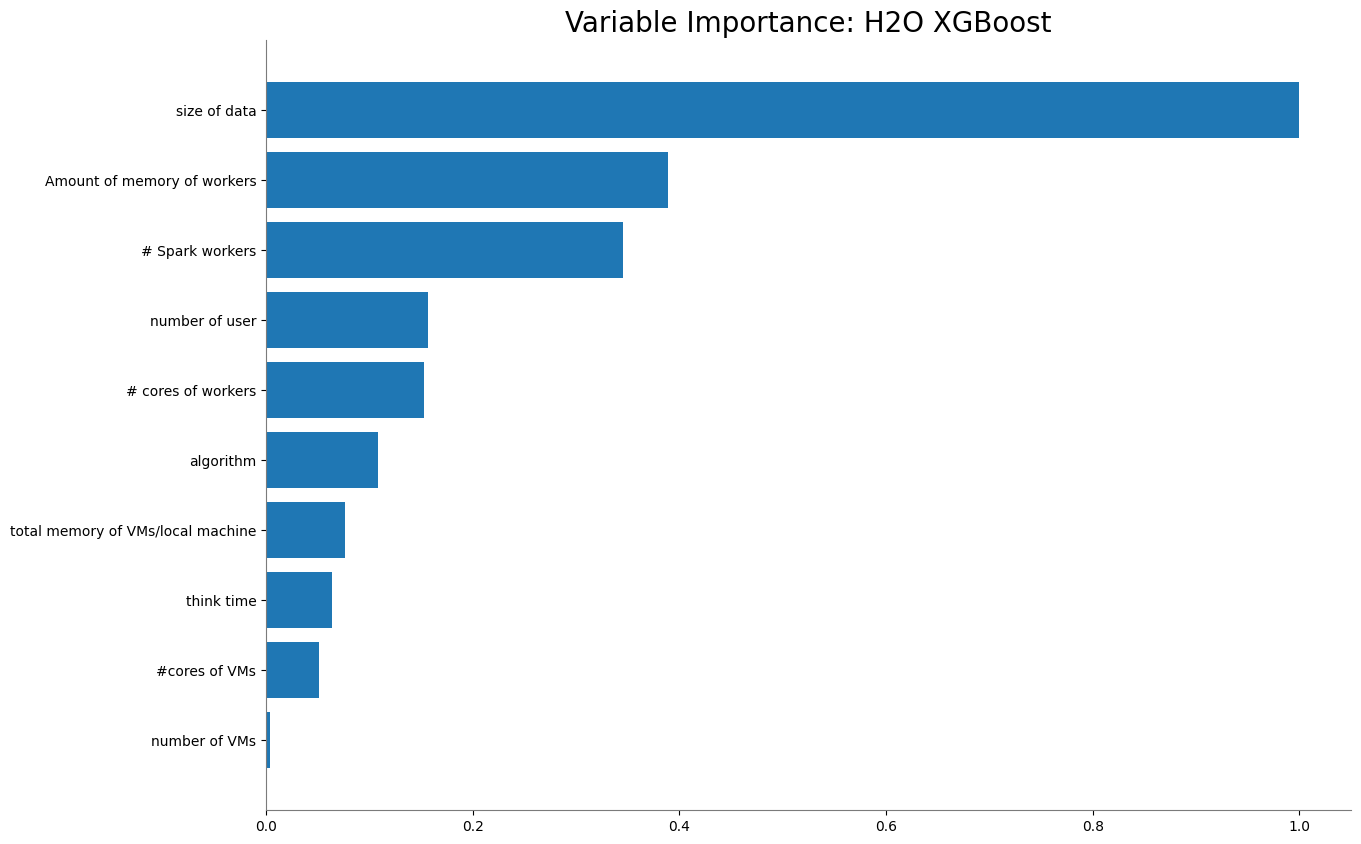

<Figure size 640x480 with 0 Axes>

In [ ]:
g=out.varimp_plot()

In [ ]:
am1.leader.download_mojo(path = "./")

'/content/GBM_5_AutoML_1_20230729_190345.zip'

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.show()

In [ ]:
plt.savefig('variable_importance_plot.pdf')
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
out = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

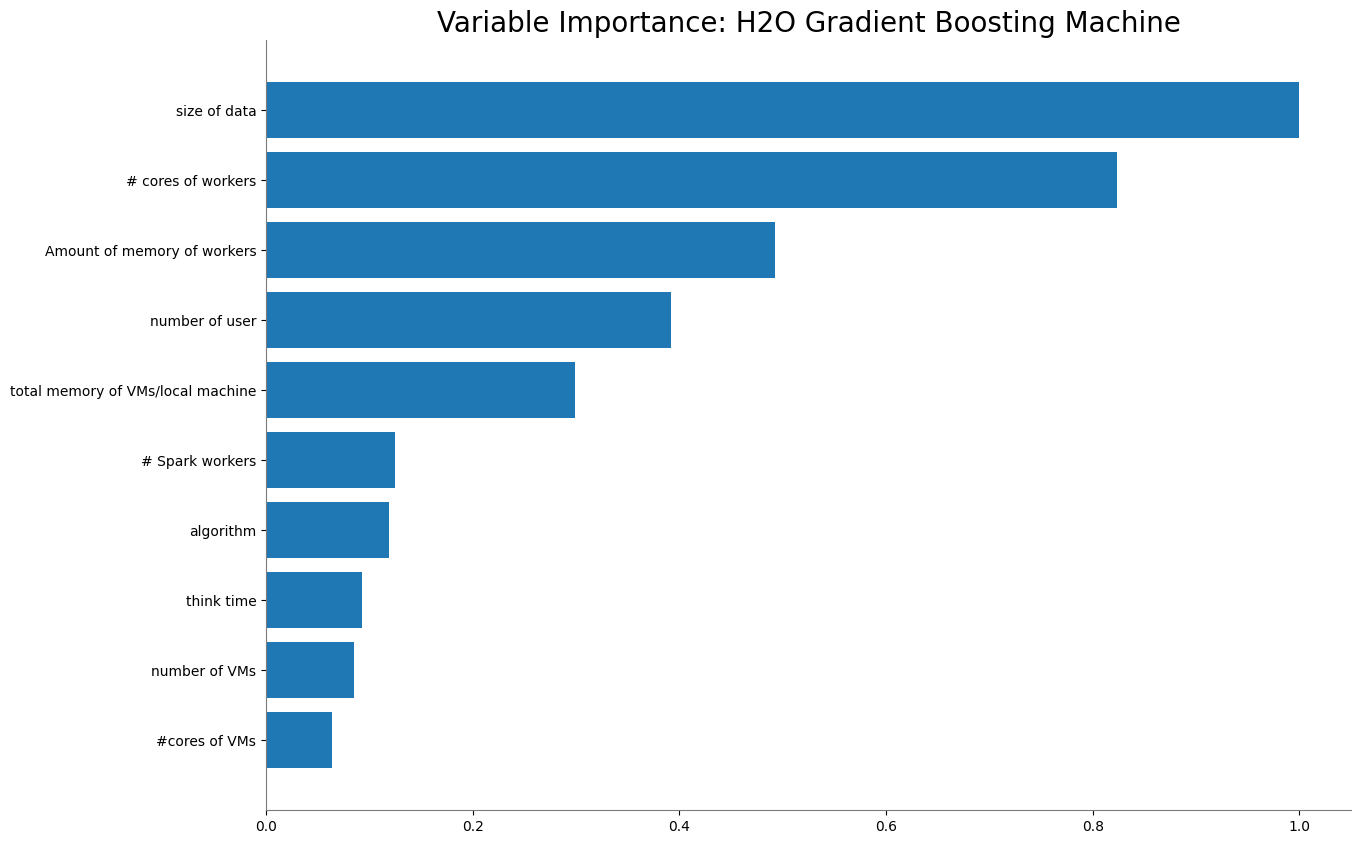

<Figure size 640x480 with 0 Axes>

In [ ]:
g=out.varimp_plot()

In [ ]:
!pip install dalex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dalex: filename=dalex-1.6.0-py3-none-any.whl size=1046000 sha256=5c844e2893c75c2221d77d75cbb22b56f5ef2b69f6bcb2e00820d64e4973c2e8
  Stored in directory: /root/.cache/pip/wheels/c8/45/19/f5810bf7c5ff9a476ebd89bb5b81a18ffcdf93931d17dbb0c1
Successfully built dalex
